In [9]:
import pandas as pd
data = pd.read_csv("applesandoranges.csv")
data.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [11]:
#Splitting the dataset into training and test samples
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

In [12]:
#Classifying the predictors and target

X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values

In [13]:
#Initializing Support Vector Machine and fitting the training data

from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,Y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
#Predicting the classes for test set

Y_pred = classifier.predict(X_test)

#Attaching the predictions to test set for comparing

test_set["Predictions"] = Y_pred
test_set.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Weight,Size,Class,Predictions
2,65,4.09,orange,2
31,66,4.68,orange,2
3,72,5.85,apple,0
21,70,4.83,orange,0
27,70,4.22,orange,2


In [17]:
#Calculating the accuracy of the predictions

#We will calculate the accuracy using the confusion matrix as follows :

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.75


In [18]:
#Visualizing the classifier

#Before we visualize we might need to encode the classes ‘apple’ and ‘orange’ into numericals.We can achieve that using the label encoder.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

In [19]:
#After encoding , fit the encoded data to the SVM

from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,Y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


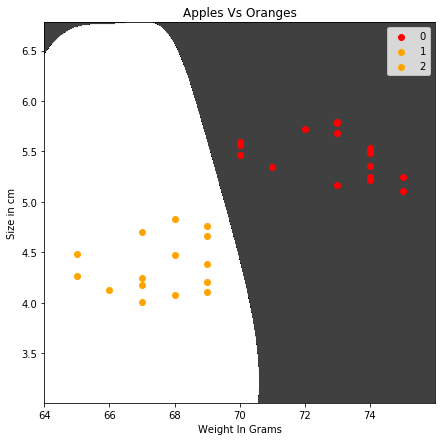

In [29]:
#Let’s Visualize!

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize = (7,7))
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'orange'))(i), label = j)
plt.title('Apples Vs Oranges')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


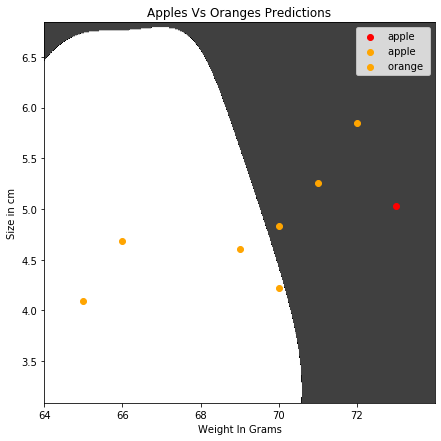

In [30]:
#Visualizing the predictions

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize = (7,7))
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'orange'))(i), label = j)
plt.title('Apples Vs Oranges Predictions')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()